# Royal Observatory of Belgium Scientific Python Tutorial

This is a tutorial explaining how to perform a certain data analysis tasks requested by members of ROB.  It includes an emphasis on sunpy but is not restricted to it.

# What sunpy is...and isn't!

See slides.

# Finding and Downloading Solar Data

## Fido

In [13]:
import astropy.units as u
from sunpy.net import Fido, attrs

Fido is the recommended client for finding, filtering and downloading solar data.  To locate and download data, it can access many clients including:
* `EVEClient`
* `GBMClient`
* `XRSClient`
* `SUVIClient`
* `LYRAClient`
* `NOAAIndicesClient`
* `NOAAPredictClient`
* `SRSClient`
* `NoRHClient`
* `RHESSIClient`
* `JSOCClient`
* `VSOClient`

To search for data with Fido, you need to specify attributes to search against. The range of attributes are found in the attrs submodule. Examples of these attributes are:
* `attrs.Time`
* `attrs.Instrument`
* `attrs.Wavelength`

whereas some of these attributes are client specific, and are found under `attrs.vso` and `attrs.jsoc`.

In [7]:
fido_query = Fido.search(
    attrs.Time('2019-01-01T00:00:00', '2019-01-01T06:00:00'),
    attrs.Sample(1 * u.hour),
    attrs.Instrument('AIA'),
    attrs.Wavelength(171 * u.angstrom),
)

In [8]:
fido_query

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2019-01-01 00:00:09,2019-01-01 00:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0
2019-01-01 01:00:09,2019-01-01 01:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0
2019-01-01 02:00:09,2019-01-01 02:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0
2019-01-01 03:00:09,2019-01-01 03:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0
2019-01-01 04:00:09,2019-01-01 04:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0
2019-01-01 05:00:09,2019-01-01 05:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0


In [40]:
fido_files = Fido.fetch(q)

In [149]:
fido_files

'/home/danny/sunpy/data/aia_lev1_171a_2019_01_01t00_00_09_35z_image_lev1.fits'

## HEK

The Heliophysics Event Knowledgebase (HEK) is a repository of feature and event information about the Sun. Entries are generated both by automated algorithms and human observers. SunPy accesses this information through the hek module, which was developed through support from the European Space Agency Summer of Code in Space (ESA-SOCIS) 2011.

To search the HEK, you need a start time, an end time, and an event type.

In [25]:
from sunpy.net import hek

In [19]:
hek_client = hek.HEKClient()  

In [20]:
tstart = '2011/08/09 07:23:56'
tend = '2011/08/09 12:40:29'
event_type = 'FL'
hek_result = hek_client.search(hek.attrs.Time(tstart,tend), hek.attrs.EventType(event_type))

In [144]:
hek_result

gs_thumburl,comment_count,hpc_bbox,frm_humanflag,hgc_coord,event_coordsys,obs_levelnum,hpc_coord,event_npixels,gs_imageurl,ar_polarity,frm_paramset,hrc_coord,event_starttime,ar_mtwilsoncls,event_type,intensmin,fl_fluence,obs_meanwavel,frm_url,skel_chaincode,bound_chaincode,noposition,fl_fluenceunit,active,intensmax,frm_versionnumber,fl_peaktempunit,fl_halphaclass,area_uncert,obs_dataprepurl,hpc_geom,hgc_bbox,intensmedian,chaincodetype,obs_channelid,event_clippedspatial,ar_noaaclass,SOL_standard,event_avg_rating,eventtype,intensunit,hpc_boundcc,event_mapurl,frm_contact,ar_penumbracls,intensmean,bound_ccstartc1,frm_name,area_atdiskcenter,frm_identifier,obs_observatory,event_description,boundbox_c2ur,obs_firstprocessingdate,boundbox_c2ll,frm_institute,hrc_bbox,refs_orig,ar_mcintoshcls,event_maskurl,bound_ccstartc2,gs_movieurl,event_score,skel_startc2,skel_startc1,fl_efoldtime,event_expires,fl_efoldtimeunit,hrc_boundcc,event_probability,intensvar,frm_daterun,event_coordunit,hpc_y,hpc_x,search_instrument,ar_numspots,kb_archivdate,kb_archivist,intenstotal,sum_overlap_scores,hgs_boundcc,intensskew,obs_includesnrt,rasterscan,obs_wavelunit,kb_archivid,search_frm_name,boundbox_c1ur,ar_noaanum,area_atdiskcenteruncert,boundbox_c1ll,event_importance_num_ratings,ar_compactnesscls,skel_curvature,event_testflag,event_c2error,hrc_r,skel_nsteps,hgs_y,obs_title,fl_peakemunit,hgs_x,hcr_checked,frm_specificid,event_title,obs_instrument,event_c1error,revision,hpc_radius,event_endtime,event_importance,event_coord2,event_coord3,event_coord1,search_observatory,area_raw,concept,event_pixelunit,hgc_boundcc,fl_peakflux,hgc_x,hrc_a,event_peaktime,hgc_y,gs_galleryid,fl_goescls,hgs_coord,ar_zurichcls,bound_ccnsteps,intenskurt,event_clippedtemporal,fl_peakfluxunit,fl_peakem,rasterscantype,search_channelid,fl_peaktemp,hgs_bbox,area_unit,obs_lastprocessingdate,refs
str185,str1,str115,str5,str29,str12,object,str27,object,str179,object,str57,str41,str19,str1,str2,object,object,float64,str82,str1,str1,str5,str1,str4,object,object,str1,str1,object,str1,str186,str118,object,str1,str4,str1,str1,str30,object,str1,str1,str1,str1,str41,str1,object,object,str32,object,str28,str4,str240,float64,str1,float64,str61,str110,str1,str1,str1,object,str144,str20,object,object,object,str1,str1,str1,object,object,str19,str10,float64,float64,str7,object,str19,str18,object,str20,str1,object,str1,str1,str2,str101,str32,float64,object,object,float64,str1,str1,object,str5,float64,float64,object,float64,str1,str1,float64,str4,str1,str18,str4,float64,str2,str19,str19,object,float64,object,float64,str4,object,str5,str1,str1,object,float64,float64,str19,float64,str47,str4,str26,str1,object,object,str1,str11,object,str1,str19,object,str116,str1,str1,object
http://www.lmsal.com/hek/gallery/podimages/2011/08/11/pod_sainz%2Bdalda_alberto_2011-08-11T17%3A26%3A07.457/thumb/panorama_asainz_AIA-211_HMI-6173_20110808T222504_at_20110811T172017.jpg,0,"POLYGON((-470 -174,573 -174,573 476,-470 476,-470 -174))",true,POINT(-113.8074292 15.364686),UTC-HPC-TOPO,None,POINT(51 151),None,http://www.lmsal.com/hek/gallery/podimages/2011/08/11/pod_sainz%2Bdalda_alberto_2011-08-11T17%3A26%3A07.457/panorama_asainz_AIA-211_HMI-6173_20110808T222504_at_20110811T172017.jpg,None,n/a,POINT(0.168543050299641 341.337688166087),2011-08-08T01:30:04,,FL,None,None,6.173e-05,n/a,,,false,,true,None,None,,,None,,010300000001000000050000000000000000607DC00000000000C065C00000000000E881400000000000C065C00000000000E881400000000000C07D400000000000607DC00000000000C07D400000000000607DC00000000000C065C0,"POLYGON((-146.807764 -5.167838,-79.64706 -5.630367,-69.862234 34.479115,-154.290862 35.148002,-146.807764 -5.167838))",None,,6173,,,SOL2011-08-08T01:30:04L247C075,0.8,9,,,,Scott Green,,None,None,asainz,None,Annotator-build_20110621-avc,SDO,"Small flare in the lower pat of the AR. Few instants before, a coronal shock wave appears from the right part of the image.",476.0,,-174.0,LMSAL,"POLYGON((0.529988 110.315196,0.633264 253.108304,0.78

In [115]:
# Convert last 4 HEK results to VSO records and download them.
from sunpy.net import hek2vso
h2v = hek2vso.H2VClient()
vso_records = h2v.translate_and_query(hek_result[-4:])

100%|██████████| 3/3 [00:14<00:00,  4.85s/records]


In [150]:
vso_records

    Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                                ...             Angstrom   
 ------------------- ------------------- ------ ... -------- --------------
 2011-08-09 08:00:14 2011-08-09 08:00:15    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:00:26 2011-08-09 08:00:27    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:00:38 2011-08-09 08:00:39    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:00:50 2011-08-09 08:00:51    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:01:02 2011-08-09 08:01:03    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:01:14 2011-08-09 08:01:15    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:01:26 2011-08-09 08:01:27    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:01:38 2011-08-09 08:01:39    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:01:50 2011-08-09 08:01:51    SDO ... FULLDISK   94.0 .. 94.0
 2011-08-09 08:02:02 2011-08-09 08:02:03    SDO ... FULLDISK   94.0 .. 94.0
            

In [151]:
# Download files, recording filenames
hek_files = [record.client.fetch(record[10]) for record in vso_records]

In [152]:
hek_files

 ['/home/danny/sunpy/data/aia_lev1_94a_2011_08_09t08_02_14_12z_image_lev1.fits'],
 ['/home/danny/sunpy/data/aia_lev1_193a_2011_08_09t08_02_34_48z_image_lev1.fits'],
 ['/home/danny/sunpy/data/aia_lev1_335a_2011_08_09t08_03_03_62z_image_lev1.fits']]

# Units and Coordinates

## Time

## SkyCoords

# Read an Image Using sunpy Map and Perform Simple Operations

In [159]:
import sunpy
import sunpy.data.sample
from sunpy.map import Map

For ease of demonstration, let's use the sunpy sample AIA data

In [160]:
sunpy.data.sample.AIA_171_IMAGE

'/home/danny/.local/share/sunpy/AIA20110607_063302_0171_lowres.fits'

In [161]:
my_map = Map(sunpy.data.sample.AIA_171_IMAGE)

/home/danny/miniconda3/envs/default/lib/python3.8/site-packages/sunpy/map/mapbase.py:290: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color='red')


Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2011-06-07 06:33:02
Exposure Time,0.234256 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.402792 2.402792] arcsec / pix
Reference Pixel,[511.5 511.5] pix

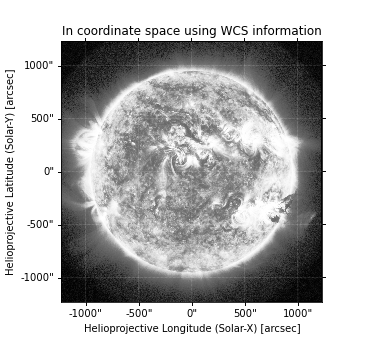
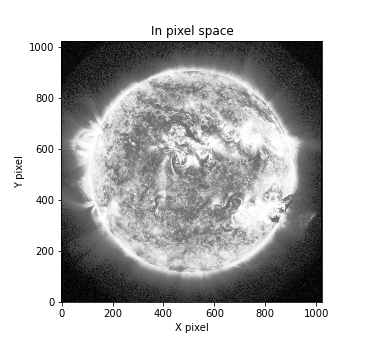
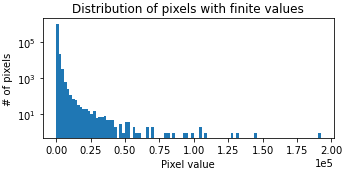

In [162]:
my_map

In [67]:
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

In [ ]:
width = 400 * u.arcsec
height = 400 * u.arcsec

In [138]:
# Crop maps to a region of interest defined in real worl coordinates.
event_center = [0.975385884204381, 286.927513064147] * u.arcsec
lower_corner = SkyCoord(Tx=event_center[0] - width/2, Ty=event_center[1] - height/2,
                        frame=frames.Helioprojective,
                        observer=my_map.observer_coordinate)
upper_corner = SkyCoord(Tx=event_center[0] + width/2, Ty=event_center[1] + height/2,
                        frame=frames.Helioprojective,
                        observer=my_map.observer_coordinate)
lower_corner

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-08-09T07:24:55.840): (lon, lat, radius) in (deg, deg, m)
    (0.00483315, 6.31337282, 1.51711685e+11)>): (Tx, Ty) in arcsec
    (-199.02461412, 86.92751306)>

    (0.00483315, 6.31337282, 1.51711685e+11)>): (Tx, Ty) in arcsec
    (200.97538588, 486.92751306)> as keyword args. From version 2.1 passing these as positional arguments will result in an error. [sunpy.util.decorators]
/home/danny/miniconda3/envs/default/lib/python3.8/site-packages/sunpy/map/mapbase.py:290: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color='red')


Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,94.0 Angstrom
Wavelength,94.0 Angstrom
Observation Date,2011-08-09 08:02:14
Exposure Time,2.900861 s
Dimension,[666. 669.] pix
Coordinate System,helioprojective
Scale,[0.600109 0.600109] arcsec / pix
Reference Pixel,[ 332.800049 -144.390015] pix

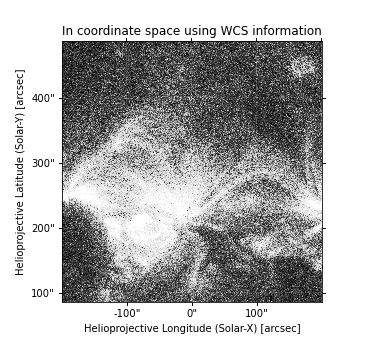
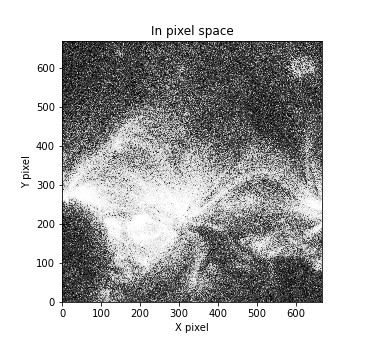
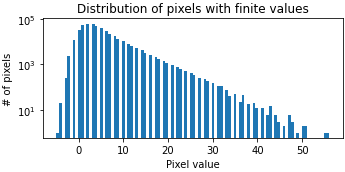

In [141]:
submap94 = map94.submap(lower_corner94, upper_corner94)
submap94

In [138]:
# Crop maps to a region of interest defined in real worl coordinates.
event_center = [0.975385884204381, 286.927513064147] * u.arcsec
lower_corner = SkyCoord(Tx=event_center[0] - width/2, Ty=event_center[1] - height/2,
                        frame=frames.Helioprojective,
                        observer=my_map.observer_coordinate)
upper_corner = SkyCoord(Tx=event_center[0] + width/2, Ty=event_center[1] + height/2,
                        frame=frames.Helioprojective,
                        observer=my_map.observer_coordinate)
submap193 = map193.submap(lower_corner, upper_corner)

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-08-09T07:24:55.840): (lon, lat, radius) in (deg, deg, m)
    (0.00483315, 6.31337282, 1.51711685e+11)>): (Tx, Ty) in arcsec
    (-199.02461412, 86.92751306)>

In [92]:
low_res_map = my_submap.superpixel([2, 2] * u.pix)

In [93]:
low_res_map.data.shape

(416, 583)

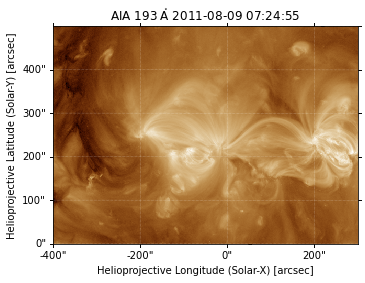

In [94]:
low_res_map.plot()

In [95]:
import matplotlib.pyplot as plt

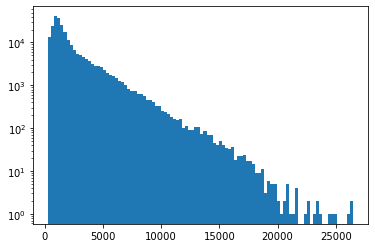

In [96]:
plt.hist(low_res_map.data.flatten(), bins=100)
plt.yscale("log")

# Plotting Data with Coordinates

* Plotting in 2-D and 3-D
* Plotting Contours
* Overplotting 

# Fitting Models to Data

# Coordinates and transformations

# Resample Images to Common Pixel Grid

# Derotating Solar Images